In [32]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

1 -> relevant
0 -> non-relevant

In [5]:
def get_tp(true, pred):
    tp_sum = 0
    for t, p in zip(true, pred):
        if t == 1 and p == 1:
            tp_sum += 1
            
    return tp_sum

In [6]:
def get_fp(true, pred):
    fp_sum = 0
    for t, p in zip(true, pred):
        if t == 0 and p == 1:
            fp_sum += 1
            
    return fp_sum

In [7]:
def get_fn(true, pred):
    fn_sum = 0
    for t, p in zip(true, pred):
        if t == 1 and p == 0:
            fn_sum += 1
            
    return fn_sum

In [8]:
def get_tn(true, pred):
    tn_sum = 0
    for t, p in zip(true, pred):
        if t == 0 and p == 0:
            tn_sum += 1
            
    return tn_sum

In [9]:
def precision(true, pred):
    tp = get_tp(true, pred)
    fp = get_fp(true, pred)
    
    return tp/(tp+fp)

In [10]:
def recall(true, pred):
    tp = get_tp(true, pred)
    fn = get_fn(true, pred)
    
    return tp/(tp+fn)

In [11]:
def get_tpr(true, pred):
    
    return recall(true, pred)

In [42]:
def get_fpr(true, pred):
    
    tn = get_tn(true, pred)
    fp = get_fp(true, pred)
    
    return fp/(tn+fp)

In [13]:
def f1_score(recall, precision):
    
    return (2 * recall * precision)/(recall+precision)

In [14]:
def accuracy_2(true, pred):
            
    return (get_tp(true, pred)+get_tn(true, pred))/len(true)

In [58]:
def calculate_logloss(true, pred):
    
    loss_list = []
    e = 1e-15
    
    for t, p in zip(true, pred):
        p = np.clip(p, e, 1-e)
        loss = -1.0 * ((t * np.log(p)) + ((1-t) * np.log(1-p)))
        loss_list.append(loss)
    
    return np.mean(loss_list)

In [15]:
def accuracy(true, pred):
    tpn_sum = 0
    for t, p in zip(true, pred):
        if t == p:
            tpn_sum += 1
            
    return tpn_sum/len(true)

In [16]:
true = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

In [17]:
acc_sk = metrics.accuracy_score(true, pred)
acc_def = accuracy(true, pred)
acc_def_2 = accuracy_2(true, pred)
assert acc_sk == acc_def == acc_def_2
acc_def

0.6153846153846154

In [18]:
prec_sk = metrics.precision_score(true, pred)
prec_def = precision(true, pred)
assert prec_sk == prec_def
prec_def

0.625

In [19]:
recall_sk = metrics.recall_score(true, pred)
recall_def = recall(true, pred)
assert recall_sk == recall_def
recall_def

0.7142857142857143

In [20]:
f1score_sk = metrics.f1_score(true, pred)
f1score_def = f1_score(recall(true, pred), precision(true, pred))
assert f1score_sk == f1score_def
f1score_def

0.6666666666666666

In [21]:
true_positive_rate = get_tpr(true, pred)
true_positive_rate

0.7142857142857143

In [24]:
false_postive_rate = get_fpr(true, pred)
false_postive_rate

0.375

In [25]:
true = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
pred = [0.234, 0.876, 0.742, 0.981, 0.453, 0.128, 0.834, 0.321, 0.643, 0.45, 0.354, 0.9865, 0.456]

In [29]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [37]:
precisions = []
recalls = []
for th in thresholds:
    th_pred = [1 if p >= th else 0 for p in pred]
    precisions.append(precision(true, th_pred))
    recalls.append(recall(true, th_pred))

Text(0, 0.5, 'precision')

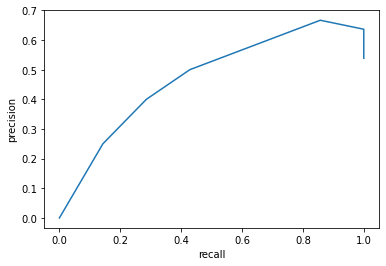

In [38]:
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')

In [43]:
tpr_list = []
fpr_list = []
for th in thresholds:
    th_pred = [1 if p >= th else 0 for p in pred]
    tpr_list.append(precision(true, th_pred))
    fpr_list.append(recall(true, th_pred))

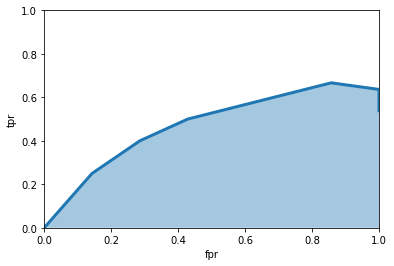

In [44]:
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.show()

In [45]:
auc_roc_score = metrics.roc_auc_score(true, pred)
auc_roc_score

0.5

In [59]:
logloss_sk = metrics.log_loss(true, pred)
logloss_def = calculate_logloss(true, pred)
assert logloss_sk == logloss_def
logloss_def

1.1760767213180812

In [23]:
logloss, multiclass , micro, macro, weighted, confusion matrix, P@k, map@k, 

SyntaxError: invalid syntax (<ipython-input-23-5c4377dd2200>, line 1)